
# Project: Investigate the TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.<br>
<ul>
<li>Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.</li>
<li>There are some odd characters
in the ‘cast’ column. Don’t worry
about cleaning them. You can
leave them as is.</li>
<li>The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time.</li>
</ul><br>

RESEARCH QUESTIONS:<br>
<ol>
    <li> How have movie production trends varied over the years?</li>
    <li> What are the top 20 highest grossing movies?</li>
    <li> What are the top 20 most expensive movies?</li>
    <li> How do budgets correlate with revenues? Do higher budget movies have higher revenue?</li>
    <li> Do certain months of release associate with better revenues?</li>
    <li> Which months have seen the maximum releases?</li>
    <li> How do ratings correlate with commercial success (profits)?</li>
    <li> Who are the top 20 directors who made highly rated films?</li>
    <li> The directors considered for should have made atleast 5 movies in the time period 1960 - 2015 represented in the dataset.</li>
</ol>



In [30]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline
warnings.filterwarnings('ignore')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [31]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
data=pd.read_csv('tmdb-movies.csv')
data.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


#### Number of rows and columns in the dataframe

In [32]:
data.shape

(10866, 21)

The dataset has information about 10866 (rows) movies with 21 diffrent information for each movie (columns)

#### Pick columns of interest and load into the dataframe to be used for analysis

In [33]:
filtred_cols = ['id','popularity','budget','revenue','original_title','director','runtime',
                'genres','production_companies','vote_count','vote_average','release_date',
                'release_year']
df=data[filtred_cols]
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_date,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,6/9/15,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,5/13/15,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,3/18/15,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,12/15/15,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,4/1/15,2015


#### Checking the type of data in the dataframe.

In [34]:
df.dtypes

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
director                 object
runtime                   int64
genres                   object
production_companies     object
vote_count                int64
vote_average            float64
release_date             object
release_year              int64
dtype: object

#### Getting some general information about the data.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_date            10866 non-null object
release_year            10866 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 1.1+ MB


#### Check for columns containing null values

In [36]:
df.columns[df.isnull().any()].tolist()

['director', 'genres', 'production_companies']

#### Number of duplicate rows in the dataset

In [37]:
sum(df.duplicated())

1

Null values and duplicated data will have bad impact on our analysis, that's why we will have to clean the data.

#### Get some satistical insight.

In [38]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


As we can see the min value for budget and revenue is zero, and that is because of the null values thus we need to clean the data.



### Data Cleaning 

#### Convert 'release_date' to datetime

In [39]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df['release_date']=pd.to_datetime(df['release_date'],format='%m/%d/%y')
pd.options.mode.chained_assignment = None

Checking data types to make sure the conversion went through

df.dtypes

#### Removing duplicate rows from dataframe

In [40]:
df.drop_duplicates(inplace = True)

Check that there are no duplicates in the dataframe

In [41]:
sum(df.duplicated())

0

#### Since not all columns have have nan values we will keep data as is (i.e. budget and revenue containe nan values outside the scope of our questions)

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1 : How have movie production trends varied over the years?

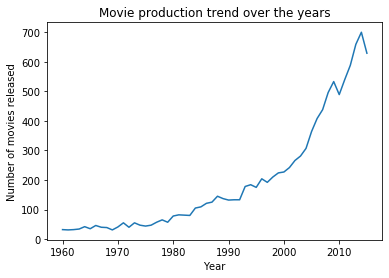

In [42]:
# Number of movies produced each year
movies_over_years = df['release_year'].value_counts().sort_index();
plt.plot(movies_over_years);
plt.title('Movie production trend over the years');
plt.xlabel('Year');
plt.ylabel('Number of movies released');

In [43]:
# Year with the maximum amount of movies produced.
movies_over_years.idxmax()

2014

In [44]:
# Year with the minimum amount of movies produced.
movies_over_years.idxmin()

1961

Movie production has increased over the years from 1960 to 2015. The decade of 2000 - 2010 shows a steep increase in production compared to previous decades.  The year 2014 with 700 movies, is the year of maximum movie production, and 1961 with 31 movies has been the year of least production.

### Research Question 2 : What are the top 20 highest grossing movies?

Text(0, 0.5, 'Movie')

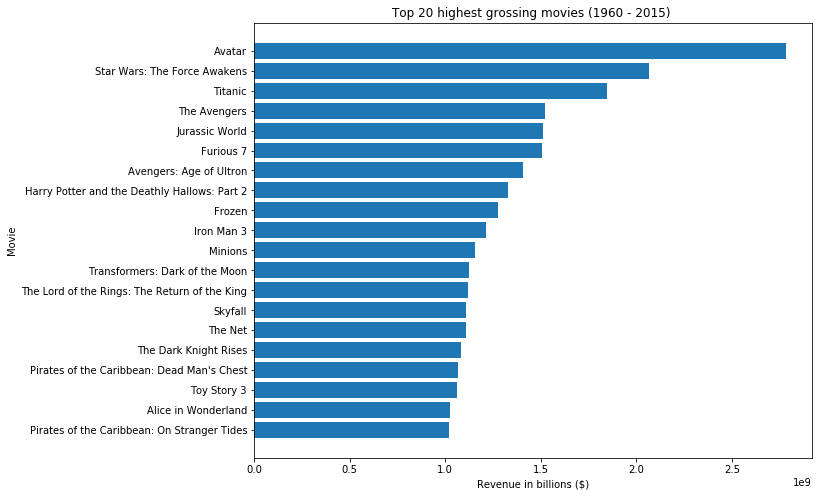

In [45]:
sorted_revenue = df['revenue'].sort_values(ascending=False)[:20]
high_grossers=pd.DataFrame()
titles=[]
revenues=[]
for i in sorted_revenue.index:
    titles.append(df.loc[i,'original_title'])
    revenues.append(sorted_revenue.loc[i])

high_grossers['Titles']=titles
high_grossers['Revenues']=revenues
fig, ax = plt.subplots(figsize=(10,8))

ax.barh(titles, revenues, align='center')
ax.invert_yaxis()
plt.title('Top 20 highest grossing movies (1960 - 2015) ')
plt.xlabel('Revenue in billions ($)')
plt.ylabel('Movie')

In [46]:
#List of top 20 highest grossing movies and their revenue
high_grossers

,Titles,Revenues
0,Avatar,2781505847
1,Star Wars: The Force Awakens,2068178225
2,Titanic,1845034188
3,The Avengers,1519557910
4,Jurassic World,1513528810
5,Furious 7,1506249360
6,Avengers: Age of Ultron,1405035767
7,Harry Potter and the Deathly Hallows: Part 2,1327817822
8,Frozen,1274219009
9,Iron Man 3,1215439994


 ### Research Question 3 : What are the top 20 most expensive movies?

Text(0, 0.5, 'Movie')

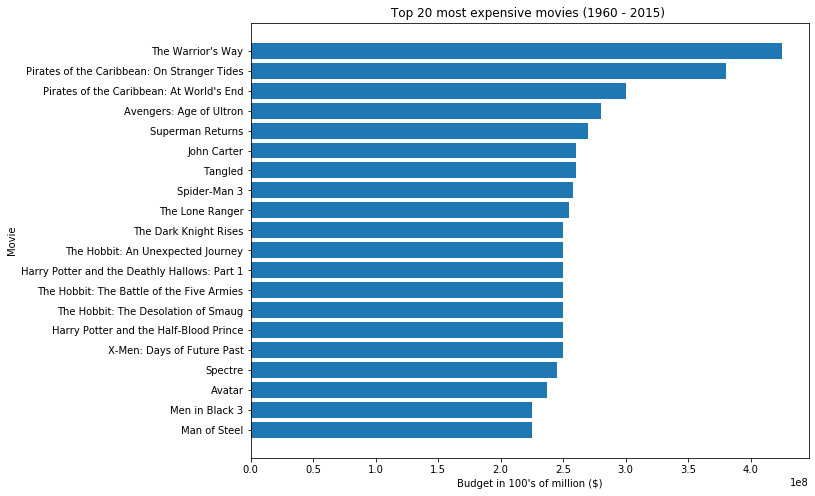

In [47]:
sorted_budget = df['budget'].sort_values(ascending=False)[:20]
high_budget=pd.DataFrame()
titles_exp=[]
budgets=[]

for i in sorted_budget.index:
    titles_exp.append(df.loc[i,'original_title'])
    budgets.append(sorted_budget.loc[i])
    
high_budget['Titles']=titles_exp
high_budget['Budgets']=budgets

fig, ax = plt.subplots(figsize=(10,8))

ax.barh(titles_exp, budgets, align='center')
ax.invert_yaxis()
plt.title('Top 20 most expensive movies (1960 - 2015) ')
plt.xlabel('Budget in 100\'s of million ($)')
plt.ylabel('Movie')

In [48]:
#List of top 20 most expensive movies
high_budget

,Titles,Budgets
0,The Warrior's Way,425000000
1,Pirates of the Caribbean: On Stranger Tides,380000000
2,Pirates of the Caribbean: At World's End,300000000
3,Avengers: Age of Ultron,280000000
4,Superman Returns,270000000
5,John Carter,260000000
6,Tangled,260000000
7,Spider-Man 3,258000000
8,The Lone Ranger,255000000
9,The Dark Knight Rises,250000000


### Research Question 4 : How do budgets correlate with revenues? Do high budgets mean high revenues?

In [49]:
# Explore the Budget and Revenue columns - find rows with zeros for budget and revenue

cols=['budget','revenue','release_date']

len(df[(df['budget']==0) | (df['revenue']==0)])

7011

There are 7011 rows where budget or revenue is zero. For the purpose of this analysis, zeros are treated as missing values. Records that have missing / zero budget or revenue data are ignored and a subset of data with non zero budgets and revenues is used for the analysis. 

In [50]:
df2=df[(df['budget']>0) & (df['revenue']>0)]
df2.shape

(3854, 13)

This dataframe with 3854 records will be used to find the correlation between budget and revenue

Text(0, 0.5, 'Revenue in billions ($)')

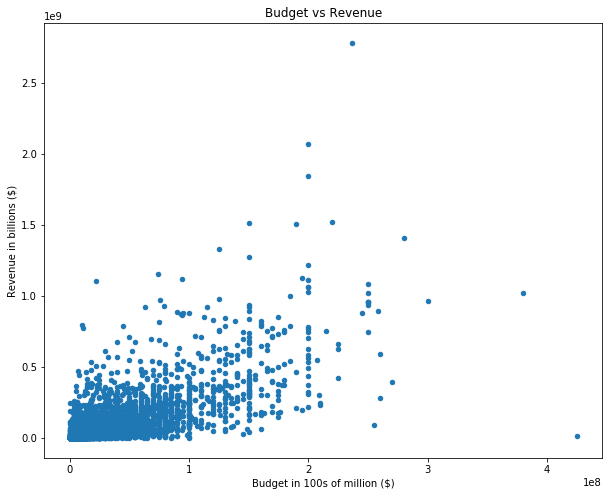

In [51]:
df2.plot(x='budget',y='revenue',kind='scatter',figsize=(10,8))
plt.title('Budget vs Revenue')
plt.xlabel('Budget in 100s of million ($)')
plt.ylabel('Revenue in billions ($)')

#### Calculation of Pearson's correlation coefficient

In [52]:
def correlation_coeff(x,y):
    std_x=(x-x.mean())/x.std(ddof=0)
    std_y=(y-y.mean())/y.std(ddof=0)
    return(std_x*std_y).mean()

correlation_coeff(df2['budget'],df2['revenue'])

0.688556152463676

From the uphill scatterplot and the value of 0.69 for the Pearson's coefficient we can infer that there is a positive relationship between budget and revenue. However , not a perfectly positive correlation. It can be seen from the plot that there are some movies with high budgets but low revenues and some with low budgets and high revenues. The outliers are more with high budget movies which get low/ moderate revenues. 

### Research Question 5 : Do certain months of release associate with better revenues?

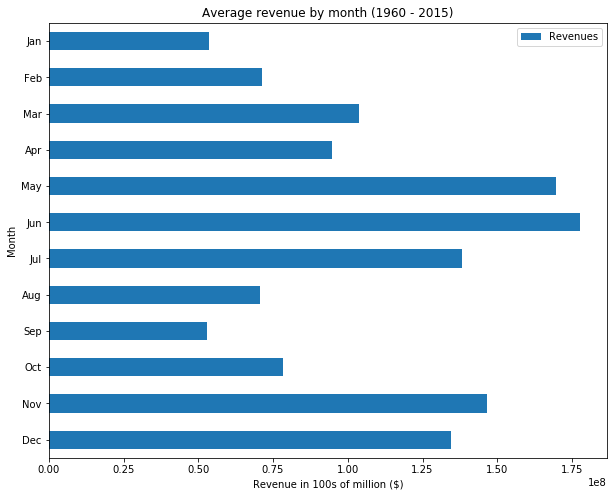

In [53]:
# Extract the month of release for every movie in a new column

df2['release_month']=df2['release_date'].dt.month

revenue_by_month = df2.groupby('release_month')['revenue'].mean()
df3=pd.DataFrame()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df3['Months']=months
df3['Revenues'] = list(revenue_by_month.get_values())
df3.plot(x='Months',y='Revenues',kind='barh',figsize=(10,8));
plt.title('Average revenue by month (1960 - 2015)');
plt.xlabel('Revenue in 100s of million ($)');
plt.ylabel('Month')
plt.gca().invert_yaxis()

June and May seem to be the months that have had the greatest revenue- It could partially be attributed to better turnout in the theatres because of summer vacations and nice weather, maybe. Nov and Dec have seen high revenues as well - It could be because of the holiday season and more turnout in theatres.

### Research Question 6 : Which months have seen the maximum releases?

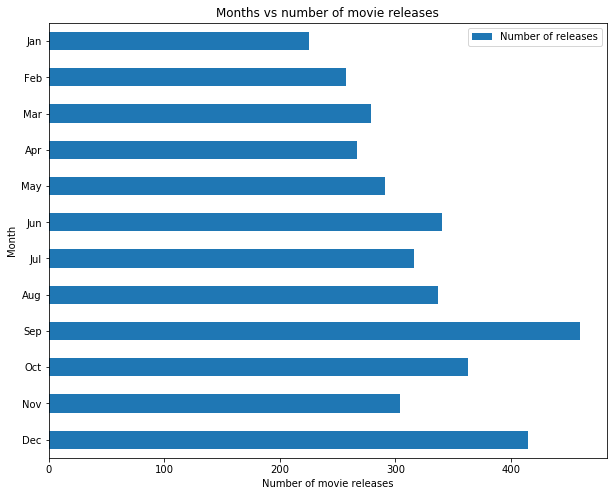

In [54]:
numreleases_month= df2.release_month.value_counts().sort_index()
df4=pd.DataFrame()
df4['Months']=months
df4['Number of releases']=numreleases_month.get_values()
df4.plot(x='Months',y='Number of releases',kind='barh',figsize=(10,8))
plt.title('Months vs number of movie releases')
plt.xlabel('Number of movie releases')
plt.ylabel('Month')
plt.gca().invert_yaxis()

September has seen the most releases followed by December

### Research Question 7 : How do ratings correlate with commercial success (profits)?

Text(0.5, 1.0, 'Rating vs Profit')

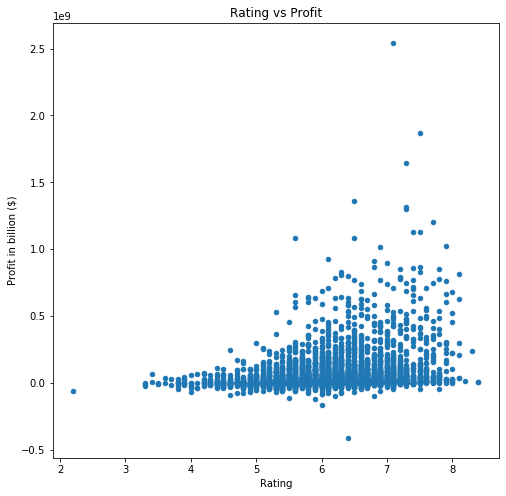

In [55]:
df2['Profit']=df2['revenue']-df2['budget']
df2.plot(x='vote_average',y='Profit',kind='scatter',figsize=(8,8))
plt.ylabel('Profit in billion ($)')
plt.xlabel('Rating')
plt.title('Rating vs Profit')

In [56]:
correlation_coeff(df2['vote_average'],df2['Profit'])

0.25943499037670126

The rating (vote_average) and profits appear to have a weak positive (uphill) relationship implying that a high rating does not strongly correlate to high profits.

### Research Question 8 : Who are the top 20 directors who made highly rated films?

Text(0.5, 0, 'Director')

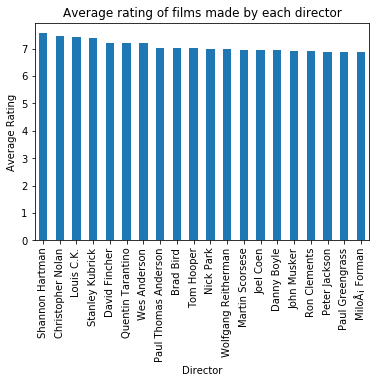

In [57]:
# Drop rows with null values in the director column
df.dropna(subset=['director'],inplace=True)

#Converting the column into a list of directors by splitting at the pipe symbol
df['director']= np.where((df['director'].str.contains('\|')), df['director'].str.split('|'), df['director'])

#Making sure every row has data as a list, even if only one director is present
df.loc[:, 'director'] = df.director.apply(np.atleast_1d)

# Horizontally stacking all the lists from all rows into one big list
all_directors = np.hstack(df.director)

# n contains the rating for that row while l contains the list of directors for that row 
#Repeating n as many times as the length of list l and merging it all into one list
all_ratings=[]
for n,l in df[['vote_average','director']].values:
    all_ratings=all_ratings+([n]*len(l))
    
# Assigning the merged lists / arrays to a new dataframe 
c = pd.DataFrame({'Director':all_directors, 'Rating':all_ratings})


director_counts = c['Director'].value_counts() 

# Create a list of directors who have made more than 5 movies 
consider=(director_counts[director_counts>5])
directors_considered= list(consider.index)

# Creating a new dataframe with information on the directors from the above list
d=c[c['Director'].isin(directors_considered)]

# Plotting based on highest average ratings (top 20 directors)
rating_by_director=d.sort_values(['Rating']).groupby('Director')['Rating'].mean()
rating_by_director.sort_values(ascending = False)[:20].plot(kind='bar')
plt.title('Average rating of films made by each director')
plt.ylabel('Average Rating')
plt.xlabel('Director')

In [58]:
rating_by_director.sort_values(ascending = False)[:20]

Director
Shannon Hartman         7.566667
Christopher Nolan       7.470000
Louis C.K.              7.433333
Stanley Kubrick         7.388889
David Fincher           7.210000
Quentin Tarantino       7.207143
Wes Anderson            7.200000
Paul Thomas Anderson    7.037500
Brad Bird               7.033333
Tom Hooper              7.016667
Nick Park               7.000000
Wolfgang Reitherman     6.975000
Martin Scorsese         6.970968
Joel Coen               6.952941
Danny Boyle             6.941667
John Musker             6.933333
Ron Clements            6.933333
Peter Jackson           6.885714
Paul Greengrass         6.866667
MiloÅ¡ Forman           6.862500
Name: Rating, dtype: float64

It seems reasonable to consider only directors who have made more than 5 movies in the time period 1960 - 2015 represented in the dataset because the time period is large and the ranking is done over a large number of directors. The above are top 20 directors (who have more than 5 films) who made highly rated films, with the average ratings of their films. 

<a id='conclusions'></a>
## Conclusions

The dataset was assessed and necessary cleaning steps were performed as documented above. Datatypes were made relevant to the context of the columns, duplicates were removed and zeros and null values were dealt with under the exploration of each research question, according to the reasoning provided. Removal of rows containing nulls and/or zeros reduced the data available for analysis, which may impact the results. The correlations explained do not imply causations. The inferences made are tentative and have scope for further refinement.
The analysis identifies the top 20 highest grossing movies, top 20 most expensive movies, months with the most movie releases, and top 20 directors based on the rating of their films
The analysis also explores the correlation of budgets with revenues, association of month of release with better revenues, and correlation of ratings with commercial success.

I have referred to Stack Overflow and Udacity Slack forums for help to complete the analysis. 